# Building a pseudo random number generator

A linear congruential generator (LCG) is an algorithm that yields a sequence of pseudo-randomized numbers calculated with a discontinuous piecewise linear equation. The method represents one of the oldest and best-known pseudorandom number generator algorithms.
The value of the sequence ($x$) at iteration point  $n+1$ is fully determined by three user-defined constants $a,c,M$ and by the previous value of the sequence at timestep $n$ ($x_n$). To begin the sequence, an integer value has to be given to the algorithm and it is called seed ($x_0$). Two sequences starting from the same seed will produce the exact same set of numbers making the method fully reproducible.

$$x_{n+1} = (a\cdot x_n + c)\; \text{mod} \; M$$
$$ M > 0 $$
$$ 0<a<M $$
$$ 0 < x_0 < M $$
$$ M \sim 10^{32}$$


A benefit of LCGs is that an appropriate choice of parameters results in a period which is both known and long. While LCGs are capable of producing pseudorandom numbers which can pass formal tests for randomness, the quality of the output is extremely sensitive to the choice of the parameters $M$ and $a$

In [1]:
from typing import Iterator
from matplotlib import pyplot as plt
import math as mt 
import numpy as np
from random import random
from random import uniform
%matplotlib notebook
%matplotlib widget

In [2]:
def linear_congruential_generator(m: int, a: int, c: int, seed: int) -> Iterator[int]:
    x = seed
    while True:
        yield x
        x = (a * x + c) % m

class LCG:

    def __init__(self):
        self.m: int = 2_147_483_648
        self.a: int = 594_156_893
        self.c: int = 10

        self.min: float = 0.0
        self.max: float = 1.0

    def set_boundaries(self, minimum:float=0.0, maximum:float=1.0) -> None:
        self.min = minimum 
        self.maximum = maximum

    def set_const(self, m:int = 2_147_483_648, a:int = 594_156_893, c:int = 10) -> None:
        self.m = m
        self.a = a
        self.c = c

    def rand_float_samples(self, n_samples: int, seed: int = 123_456_789) -> list[float]:
        """
        This function uses an LCG to output a sequence of pseudo-random floats from the uniform distribution on [0, 1)
        :param n_samples: the number of pseudo-random floats to generate
        :param seed: the starting state of the LCG. It is used to initialize the pseudo-random number sequence
        :return: a list of length n_samples containing the generated pseudo-random numbers
        """
        gen = linear_congruential_generator(self.m, self.a, self.c, seed)
        sequence = []
    
        for i in range(0, n_samples):
            rand: float = next(gen) / self.m
            #scaling in min max
            rand = self.min + rand * (self.max - self.min)
            sequence.append(rand)
    
        return sequence


lcg = LCG()

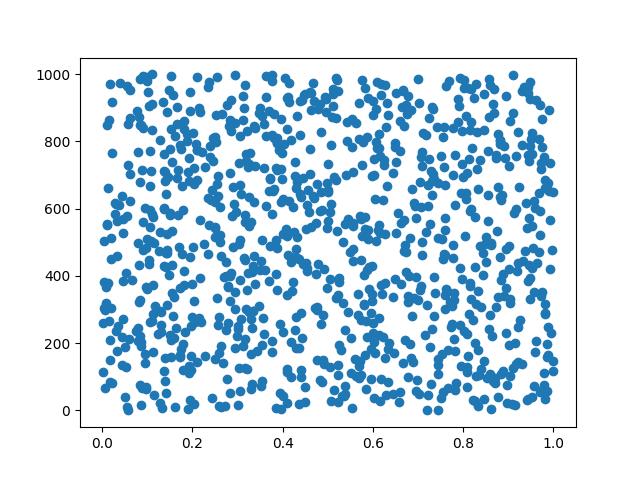

In [3]:
n = 1000
rand_sequence = lcg.rand_float_samples(n)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(rand_sequence, range(0, n))

# Uniform distributions with LCG random numbers



# Flaws of LCGs algorithms

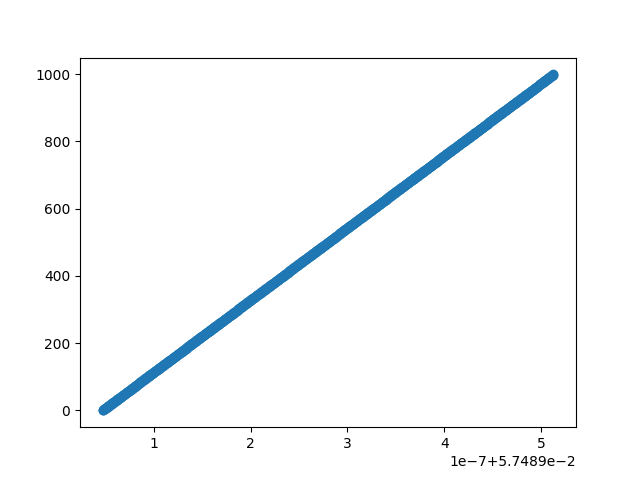

In [4]:
n = 1000
lcg.set_const(a=1, c=1)
rand_sequence = lcg.rand_float_samples(n)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(rand_sequence, range(0, n))

# The failure of IBM's RANDU

*RANDU* is a linear congruential pseudorandom number generator of the Park–Miller type, which was used primarily in the 1960s and 1970s and developed by IBM. It is defined by the recurrence relationship
$$  x_{n+1} = 65539\cdot x_{n}\; \text{mod} \; {2}^{31}$$

With following choice of parameters 

$$ x_{0} = \text{an odd integer number}$$

IBM's *RANDU* is widely considered to be one of the most ill-conceived random number generators ever designed. It fails the spectral test badly for dimensions greater than 2.

For any linear congruential generator with modulus $m$ used to generate points in $n$-dimensional space, the points fall in no more than 
 $(n!\times m)^{1/n}$ parallel hyperplanes. For RANDU, having $m = {2}^{31}$ it means that in three dimensions all the points fall into at most in 2344 planes. When coupled with the fact that $a=65539$ the situation is much worse, leading to the fact that all the points will fall into 15 planes (Marsaglia's theorem).  This indicates that low-modulus LCGs are unsuited to high-dimensional Monte Carlo simulation.


As a result of the wide use of *RANDU* in the early 1970s, many results from that time are seen as suspicious. It was believed to have been widely purged by the early 1990s but there were still FORTRAN compilers using it as late as 1999.

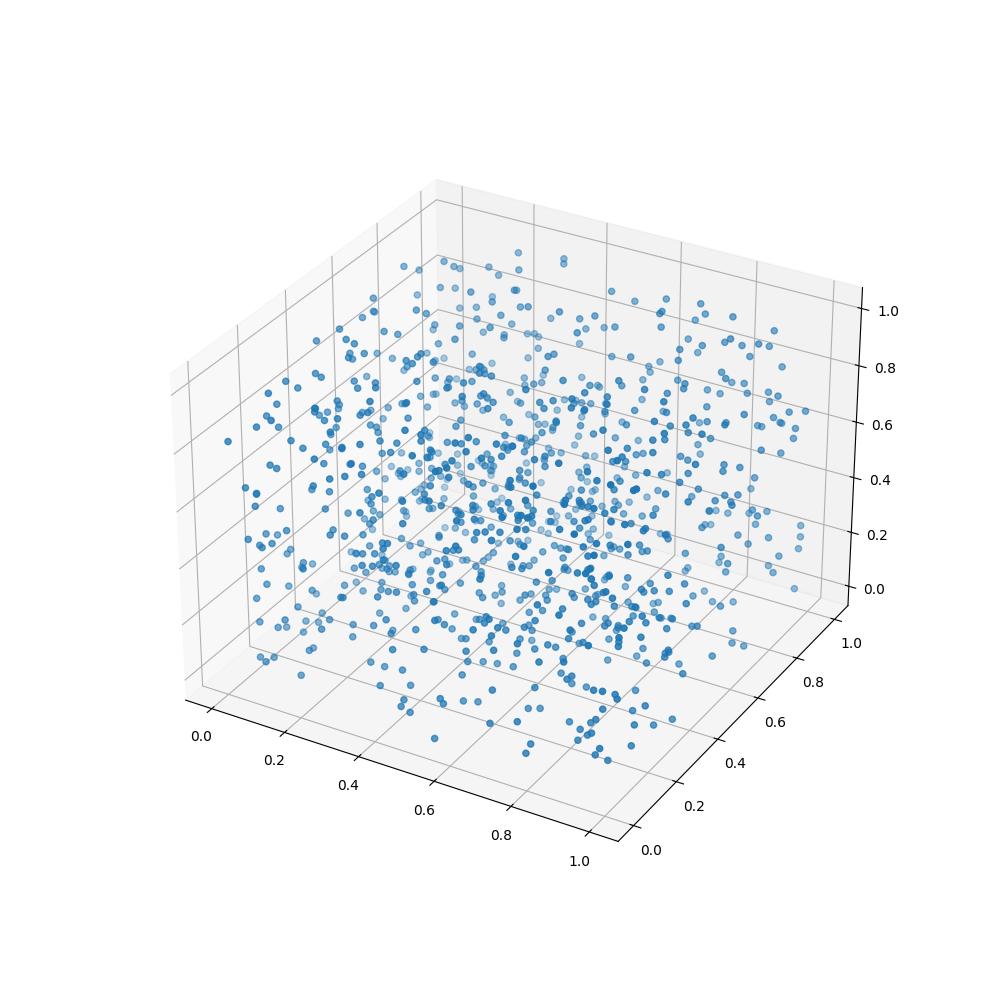

In [5]:
n = 3*1000
lcg.set_const(a=65539, c=0, m=2**31)

#[x,y,z] = [x_n, x_n+1, x_n+2]

rand_sequence = np.array(lcg.rand_float_samples(n)).reshape(-1, 3)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(rand_sequence[:,0], rand_sequence[:,1], rand_sequence[:,2] )

# Sphere volume with RANDU

In [6]:
n = 3*10000
lcg.set_const(a=65539, c=0, m=2**31)

#[x,y,z] = [x_n, x_n+1, x_n+2]

lcg.set_boundaries(minimum=0.0, maximum=1.0)
rand_sequence = np.array(lcg.rand_float_samples(n)).reshape(-1, 3)


# sphere r=1 --> x^2 + y^2 + z^2 < 1
# volume 4/3 pi r^3 
vol = 4./3 * mt.pi 

catch = np.array([i for i in rand_sequence if i[0]**2 + i[1]**2 + i[2]**2 <= 1])

In [7]:
float(len(catch)) / (10000) * 8

4.1792

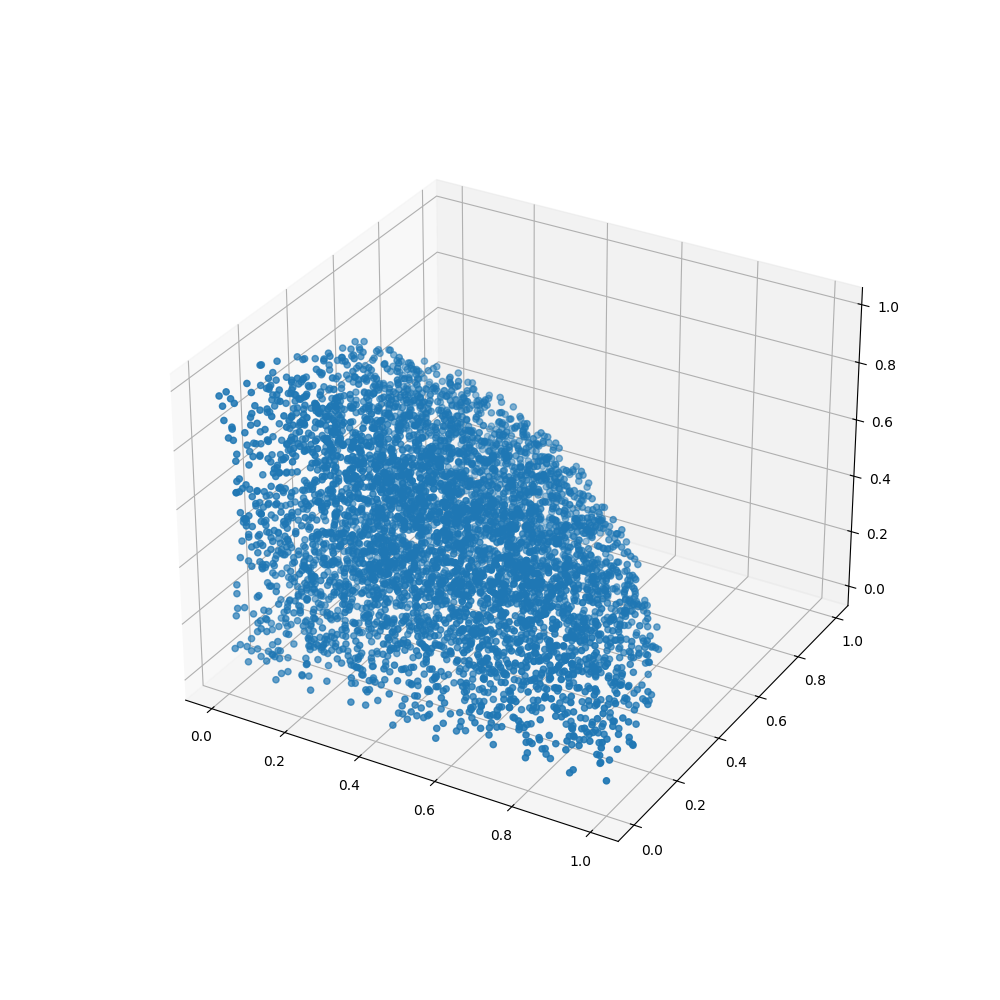

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(catch[:,0], catch[:,1], catch[:,2] )

# Sphere volume with python random

In [9]:
n = 3*10000

rand_sequence = np.array([random() for _ in range(n)]).reshape(-1, 3)


# sphere r=1 --> x^2 + y^2 + z^2 < 1
# volume 4/3 pi r^3 
vol = 4./3 * mt.pi 

catch = np.array([i for i in rand_sequence if i[0]**2 + i[1]**2 + i[2]**2 <= 1])

In [10]:
float(len(catch)) / (10000) * 8

4.1392

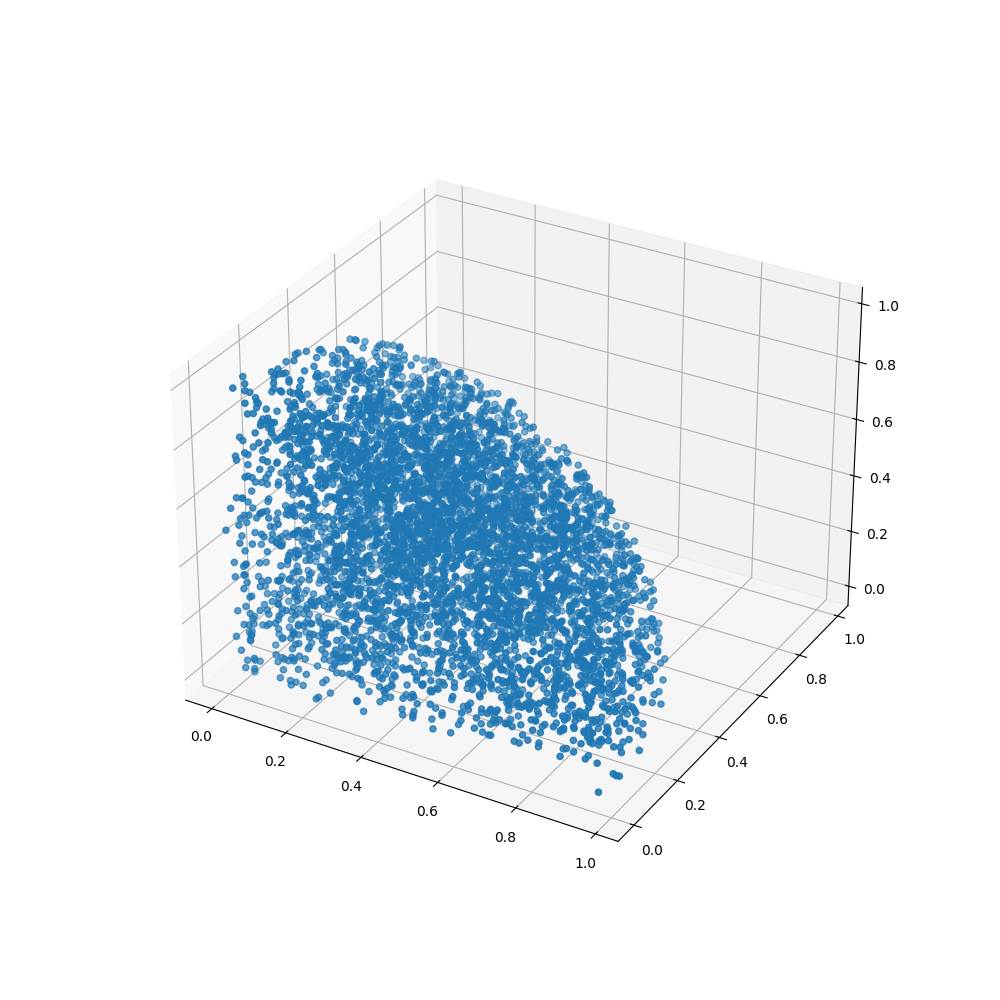

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(catch[:,0], catch[:,1], catch[:,2] )

# Comparing the convergence of the two methods

In [12]:
experiments = np.linspace(10, 5000, 30, dtype=int)
lcg.set_const(a=65539, c=0, m=2**31)

true_volume = 4./3 * mt.pi
lcg__ = []
rand__ = []

lcg.set_boundaries(minimum=-1, maximum=1)
box_volume = 2**3

for n in experiments:
    print(n)
    # first compute the lcg one
    n__ = 3*n
    rand_sequence = np.array(lcg.rand_float_samples(int(n__))).reshape(-1, 3)
    catch = np.array([i for i in rand_sequence if i[0]**2 + i[1]**2 + i[2]**2 <= 1])
    lcg__.append(float(len(catch)) / (n) * box_volume)

    # then compute the rand
    rand_sequence = np.array([uniform(-1.0, 1.0) for _ in range(int(n__))]).reshape(-1, 3)
    catch = np.array([i for i in rand_sequence if i[0]**2 + i[1]**2 + i[2]**2 <= 1])
    rand__.append(float(len(catch)) / (n) * box_volume)

10
182
354
526
698
870
1042
1214
1386
1558
1730
1902
2074
2246
2418
2591
2763
2935
3107
3279
3451
3623
3795
3967
4139
4311
4483
4655
4827
5000


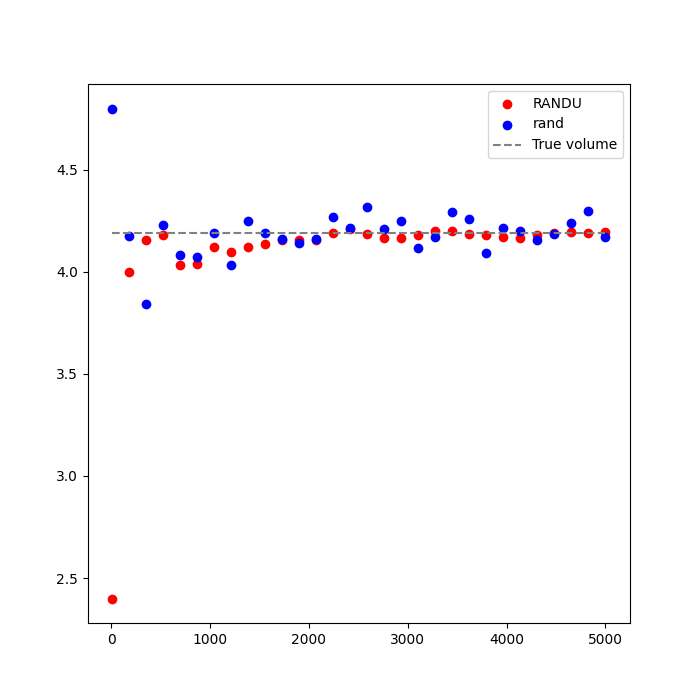

In [13]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.scatter( experiments, lcg__, color="red", label="RANDU")
ax.scatter( experiments, rand__, color="blue", label="rand")

ax.hlines(true_volume, min(experiments), max(experiments), color="grey", linestyles="--", label="True volume")

ax.legend()
#ax.set_yscale("log")

# 